In [1]:
import numpy as np
from math import cos,sqrt,exp
import matplotlib.pyplot as plt

# Simple Programming Exercises
## 1.
### (a)

In [2]:
def function(x):
    output = (x**2)*(exp(-2*x))+((cos(3*x))/(sqrt(1+x)))
    return output

In [3]:
vfunc = np.vectorize(function)
vfunc([0,1,2,3,4,5,6,7,8])

array([ 1.        , -0.56469512,  0.62761713, -0.43325636,  0.38275037,
       -0.30900629,  0.24979745, -0.19361079,  0.1414002 ])

### (b)

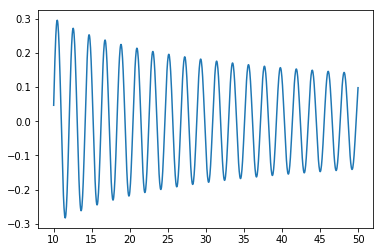

In [4]:
interval = np.linspace(10,50,1000)
out=vfunc(interval)
plt.plot(interval,out)
plt.show()

## 2.

In [5]:
def norm(x):
    squares=[i**2 for i in x]
    return sqrt(sum(squares))
print(norm([1,2,3,4]))
print(norm([-1,-2,0,1,2]))

5.477225575051661
3.1622776601683795


## 3.
### (a)

In [6]:
def for_factorial(x):
    
    factorial = 1
    if x < 0:
        print("must be positive")
    elif x == 0:
        print("factorial of 0 = 1")
    else:
        for i in range(1,x + 1):
            factorial = factorial*i
        print('factorial of ' + str(x) + ' = ' + str(factorial))
(for_factorial(-8))
(for_factorial(0))
(for_factorial(4))
(for_factorial(8))

must be positive
factorial of 0 = 1
factorial of 4 = 24
factorial of 8 = 40320


### (b)

In [7]:
def while_factorial(n):
    num = 1
    while n >= 1:
        num = num * n
        n = n - 1
    print('factorial = '+ str(num))
(while_factorial(4))
(while_factorial(7))
(while_factorial(0))

factorial = 24
factorial = 5040
factorial = 1


## 4.
### (a)

In [8]:
def fiblist(n, sequence):
    length = len(sequence)
    if length == n:
        return
    if length == 0 or length == 1:       
        sequence.append(1)
    else:
        sequence.append(sequence[length-1]+sequence[length-2])
    fiblist(n, sequence)    
sequence = []
fiblist(15, sequence)
print(sequence) 

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]


### (b)

In [9]:
def fib(n):
    if n == 0: 
        return 0
    elif n == 1: 
        return 1
    else: 
        return fib(n-1)+fib(n-2)
gold=(1+sqrt(5))/2
def approx_gold(e):
    n=2
    while abs(((fib(n)/(fib(n-1))))-gold)>e:
        n=n+1
    return ((fib(n)/(fib(n-1))))

In [10]:
print(approx_gold(.1))
print(approx_gold(.0001))
print(approx_gold(.0000000001))

1.6666666666666667
1.6179775280898876
1.6180339886704431


## 5.

In [11]:
B=[1,2,3]
I=[[1,0,0],[0,0,1],[0,1,0]]
C=[[1,2,3],[3,4,6],[5,6,7]]
D=[1,2,3,4]
def mat_vect_using_numpy(a,b):
    if len(a) != len(b):
        print("size error")
    else:
        return list(np.matmul(a,b))
print(mat_vect_using_numpy(C,B))
print(mat_vect_using_numpy(C,D))
print(mat_vect_using_numpy(I,B))

[14, 29, 38]
size error
None
[1, 3, 2]


In [12]:
def mat_vect_using_fors(A,y):
    k=A
    if len(A)==len(y):
        for i in range(len(A)):
            for j in range(len(y)):
                k[i][j]=(A[i][j]*y[j])
        vector = [sum(i) for i in k]
        return vector
    elif len(A)!=len(y):
        print('size error')
print(mat_vect_using_fors(C,B))
print(mat_vect_using_fors(C,D))
print(mat_vect_using_fors(I,B))

[14, 29, 38]
size error
None
[1, 3, 2]


# Root Finding
## 1. Division without division

In [13]:
def f(x):
    return(exp(x)*cos(x))
def bisection(a,b,tol):
    c = (a+b)/2.0
    while (b-a)/2.0 > tol:
        if f(c) == 0.0:
            return c
        elif f(a)*f(c) < 0.0:
            b = c
        else :
            a = c
        c = (a+b)/2.0

    return c
bisection(0,10,.001)

7.8533935546875

In [20]:
## approximates a / b with error of at most epsilon
## x_not must be positive and less than 2 / b
## epsilon must be less than x_not
def approx_div(a, b, x_not, epsilon):
    if x_not <= 0 or b * x_not >= 2:
        raise ValueError("x_not must be positive and less than 2 / b")
    if epsilon >= x_not:
        raise ValueError("x_not must be greater than epsilon")
    ## approximate 1/b by approximating the root of b - 1/x
    x = x_not
    xn = x * (2 - (b * x))
    while abs(x - xn) >= abs(epsilon):
        x = xn
        xn = x * (2 - (b * x))
        
    return xn * a
    

In [23]:
approx_div(1.0, 2.0, 2.168404344971009e-18, 2.168404344971009e-19)

0.5

In [24]:
def newton(f, df, x_not, err, iter_max):
    i = 1
    x = 0
    while abs(x_not - x) > err and i < iter_max:
        denom = df(x_not)
        if denom == 0:
            return (0, False, 'denom was 0 😭')
        
        x = x_not - approx_div(f(x_not), denom, 2.168404344971009e-18, 2.168404344971009e-19)
    
        i += 1
        x_not = x
        
    if i >= iter_max:
        return (0, False, 'exceeded max iterations 😭')
    else:
        return (x, True, '')
    
    

In [32]:
f = lambda x: (x**5) - (x**4) + 2
df = lambda x: 5*(x**4) - 4*(x**3)
newton(f, df, -1.0, 0.0000000001, 1000)

(-1.0, True, '')